<a href="https://colab.research.google.com/github/afifahsalsa/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# **Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


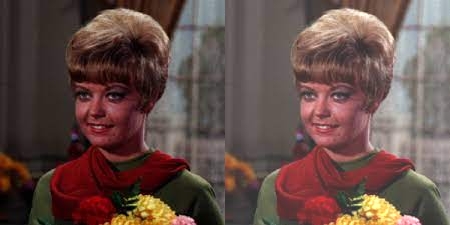

In [8]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum**

menggunakan rumus inverse citra

g(x) = 255 - f(x)

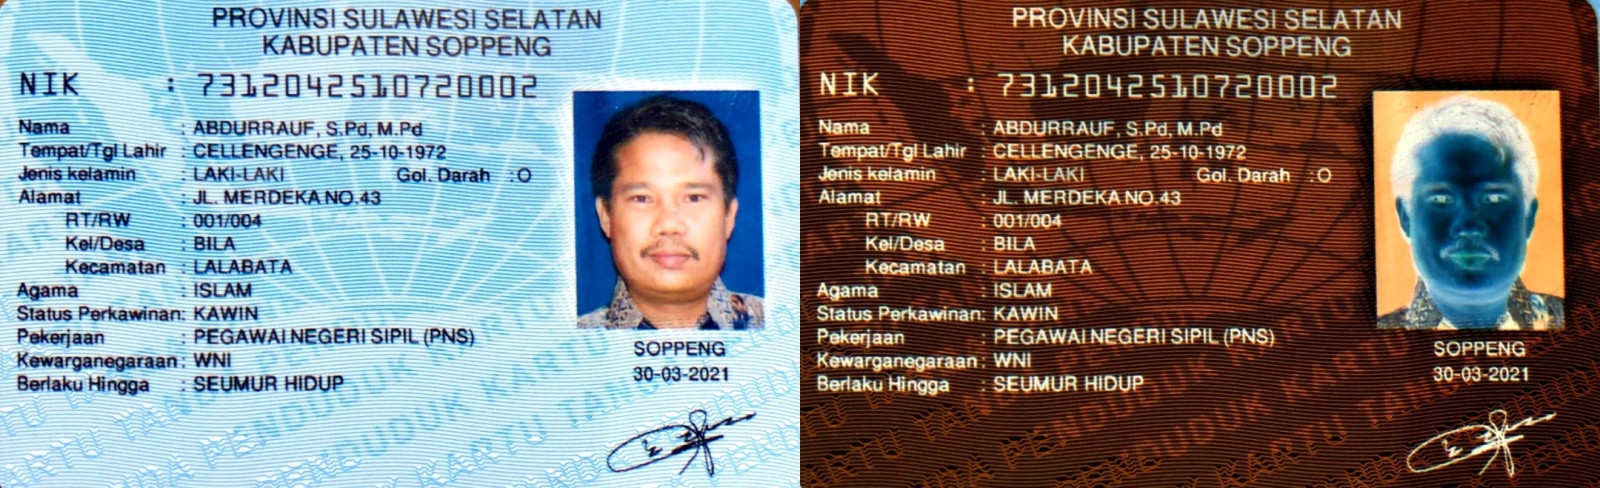

In [11]:
original = cv.imread('/content/drive/MyDrive/KTP.jpeg')
negative_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      negative_image[y,x,c] = np.clip(255 - original[y,x,c], 0, 255)
#cara simpel tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255, -255]: 50
Masukkan kontras [1.0 - 3.0]: 2


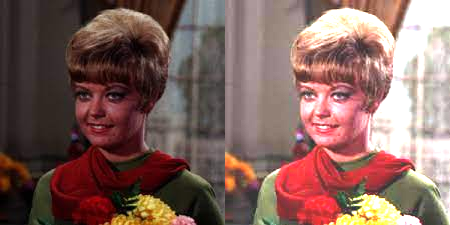

In [19]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255, -255]: '))
  kontras = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(kontras*original[y,x,c] + brightness, 0, 255)
#peningkatan kontras
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 50


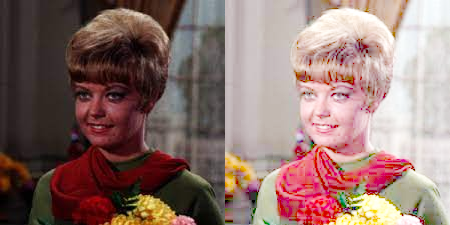

In [27]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)
#peningkatan kontras
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

averaging

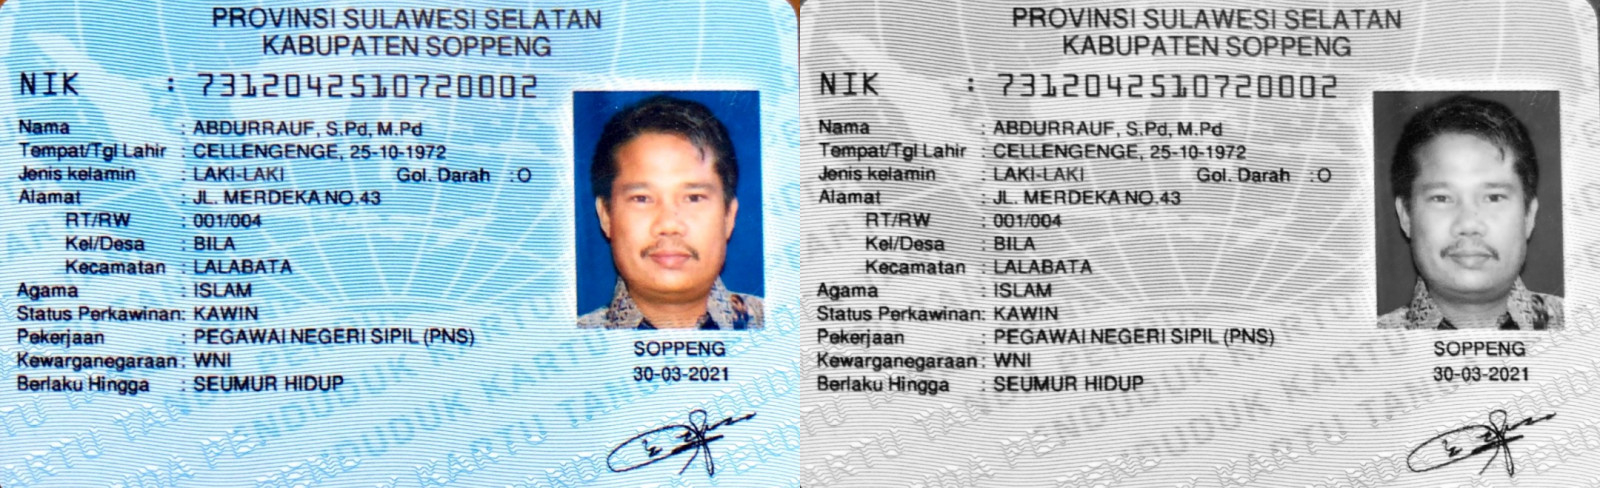

In [51]:
original = cv.imread('/content/drive/MyDrive/KTP.jpeg')
avg_color = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      avg_color[y,x,c] = np.clip(np.mean(original[y,x]),0, 255)

final_frame = cv.hconcat((original,avg_color))
cv2_imshow(final_frame)

lightness

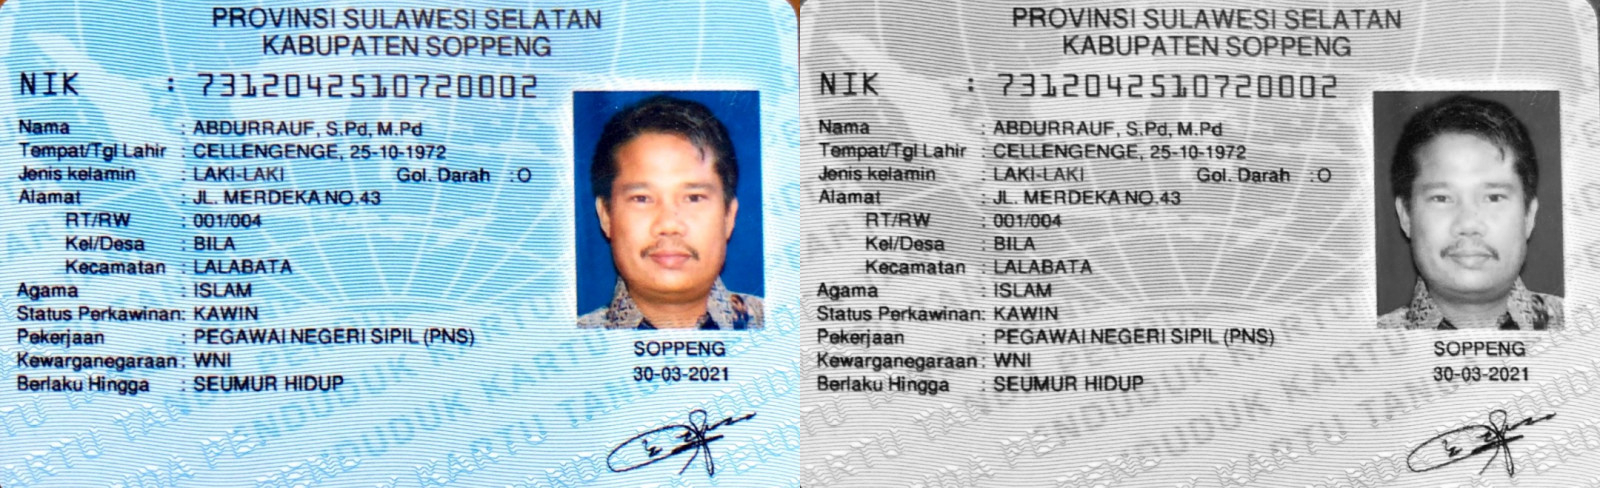

In [67]:
original = cv.imread('/content/drive/MyDrive/KTP.jpeg')
light_color = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      light_color[y,x,c] = np.clip((np.max(original[y,x])/2 + np.min(original[y,x]/2)),0, 255)

final_frame = cv.hconcat((original,light_color))
cv2_imshow(final_frame)

luminance

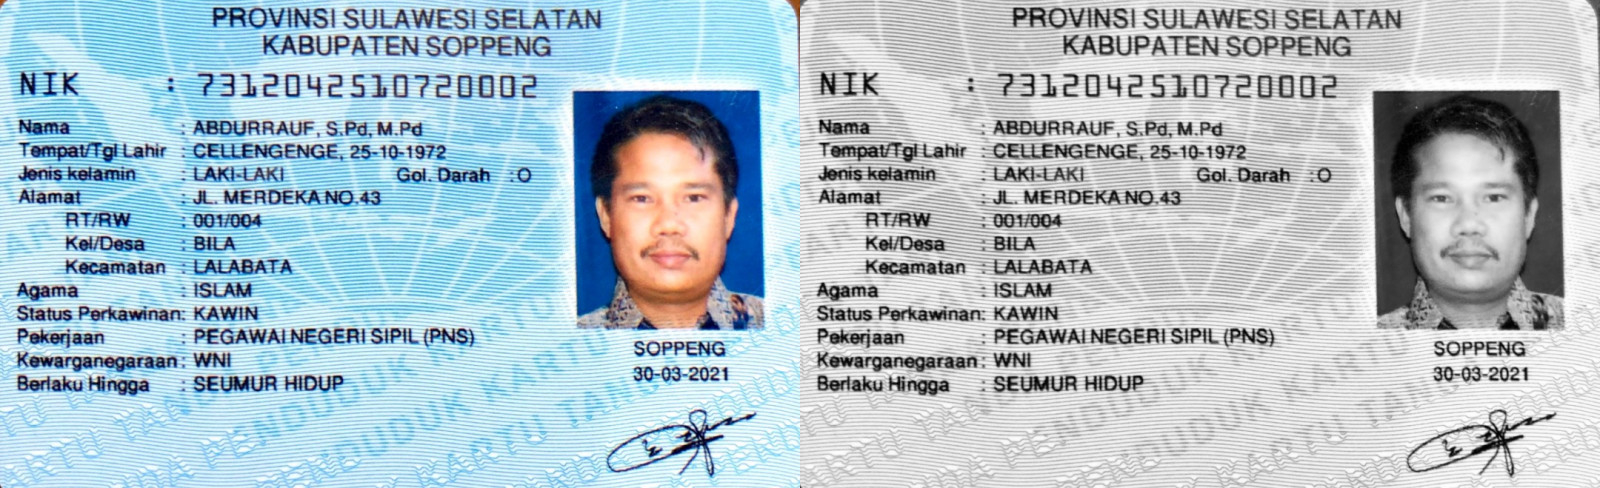

In [66]:
original = cv.imread('/content/drive/MyDrive/KTP.jpeg')
lum_color = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]): #tinggi
  for x in range(original.shape[1]): #lebar
    for c in range(original.shape[2]): #warna
      B,G,R = original[y,x]
      lum = 0.21*R+0.72*G+0.07*B
      lum_color[y,x,c] = np.clip(lum, 0, 255)

final_frame = cv.hconcat((original,lum_color))
cv2_imshow(final_frame)

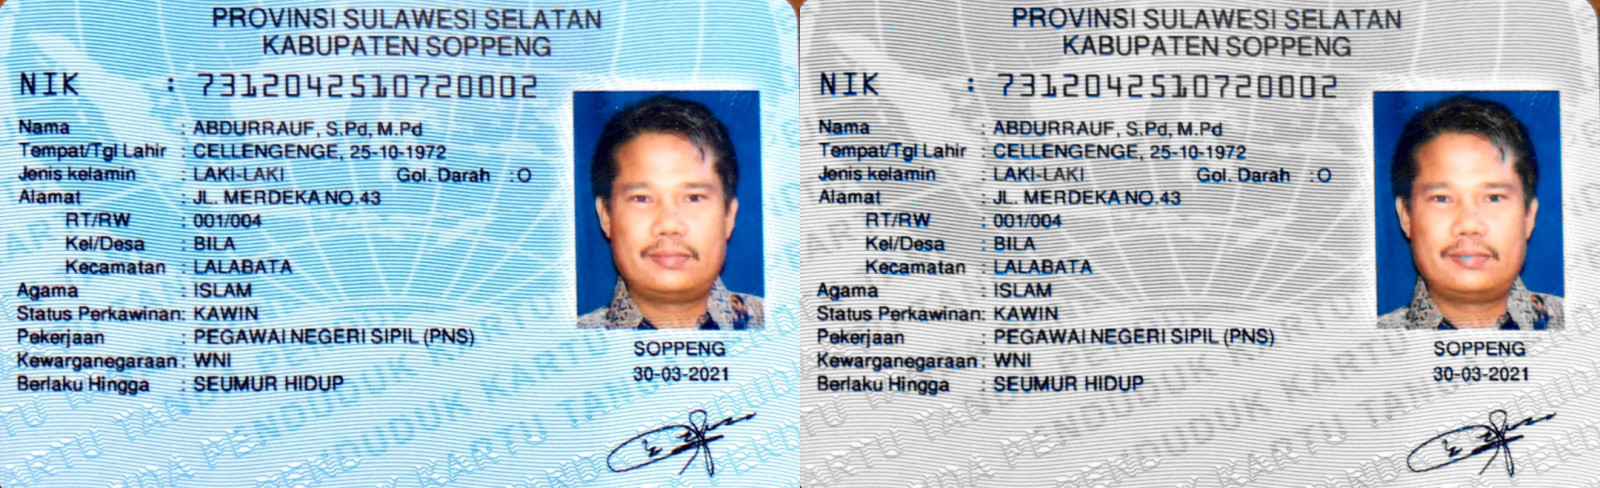

In [104]:
original = cv.imread('/content/drive/MyDrive/KTP.jpeg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

mask_skin = cv.inRange(hsv, lower_skin, upper_skin)
res_skin = cv.bitwise_and(img,img, mask= mask_skin)

# Definisikan rentang warna bingkai dalam HSV
lower_frame = np.array([100,150,0])
upper_frame = np.array([140,255,255])

mask_frame = cv.inRange(hsv, lower_frame, upper_frame)
res_frame = cv.bitwise_and(img,img, mask= mask_frame)
mask_combined = cv.bitwise_or(mask_skin, mask_frame)

# Ubah citra asli ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_res = cv.bitwise_and(gray,gray, mask= cv.bitwise_not(mask_combined))

gray_res_bgr = cv.cvtColor(gray_res, cv.COLOR_GRAY2BGR)

# Gabungkan citra grayscale dengan citra kulit dan bingkai
final = cv.bitwise_or(gray_res_bgr, res_skin)
final = cv.bitwise_or(final, res_frame)

final_frame = cv.hconcat((original,final))
cv2_imshow(final_frame)